In [50]:
import os 
os.chdir(r'C:\Users\user\jupyter\python\mini_project\finance index')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic' # 폰트 설정. 특히 jupyter 환경에서는 한글 깨질 위험있으니 설정 필수
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30, 10) # 그래프 사이즈 설정. 나중에 변경 가능.
# 전반적인 설정

#### 달러 5개년 데이터 전처리

In [2]:
dollar = pd.read_csv('dollar_5_year.csv')

In [3]:
#comma 제거 함수 설정
def remove_comma(x):
    return x.replace(',', '')
comma_list = ['종가', '오픈', '고가', '저가', '변동 %']

for i in comma_list:
    dollar[i] = dollar[i].apply(remove_comma)


In [4]:
dollar['날짜'] = pd.to_datetime(dollar['날짜'], format = '%Y년 %m월 %d일')
dollar[['종가', '오픈', '고가', '저가']] = dollar[['종가', '오픈', '고가', '저가']].astype('float')
dollar.dtypes
# 아마도 바로 데이터 타입을 float으로 바꾸지 못한다. comma 제거 필수

날짜      datetime64[ns]
종가             float64
오픈             float64
고가             float64
저가             float64
변동 %            object
dtype: object

In [5]:
dollar = dollar.sort_values(by = '날짜').reset_index(drop = True)
dollar_end = dollar[['날짜', '종가']]

# 이제 대표값을 어떻게 잡을까?? 종가와 오픈가를 기준으로 잡아주는 것이 좋겠지?

In [6]:
dollar_end.columns = ['date', 'end price']
### 존나 간단한 전처리 마무리함. 

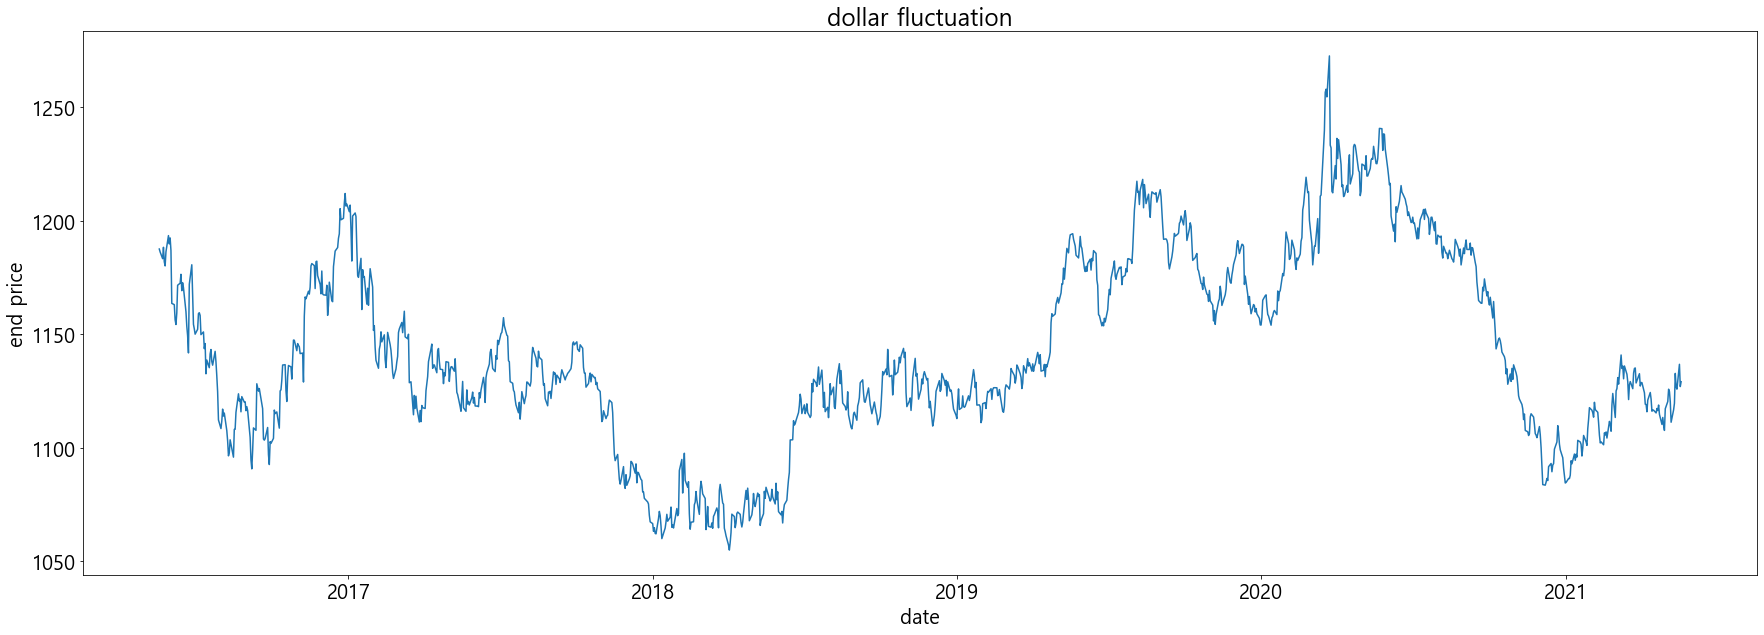

In [7]:
plt.xlabel('date')
plt.ylabel('end price')
plt.title('dollar fluctuation')

plt.plot(dollar_end['date'], dollar_end['end price'])

#### 은 5개년 데이터 전처리

In [9]:
silver = pd.read_csv('silver_5_year.csv')

In [11]:
silver.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 05월 19일,28.010,28.267,28.340,27.948,-,-1.14%
1,2021년 05월 18일,28.333,28.325,28.900,28.120,77.21K,0.21%
2,2021년 05월 17일,28.274,27.515,28.435,27.440,86.80K,2.51%
3,2021년 05월 16일,27.582,27.483,27.610,27.455,-,0.79%
4,2021년 05월 14일,27.365,27.190,27.595,26.920,58.61K,1.13%


In [14]:
silver.describe()

,종가,오픈,고가,저가
count,1557.000000,1557.000000,1557.000000,1557.000000
mean,18.984986,18.369744,18.464295,18.271279
std,3.443741,3.647730,3.745138,3.540915
min,11.949000,12.370000,12.370000,12.085000
25%,16.835000,16.115000,16.150000,16.030000
50%,18.149000,17.130000,17.178000,17.100000
75%,19.401000,18.651000,18.699000,18.593000
max,30.023000,30.470000,30.850000,29.530000


In [16]:
silver.dtypes

날짜       object
종가      float64
오픈      float64
고가      float64
저가      float64
거래량      object
변동 %     object
dtype: object

In [18]:
silver['날짜'] = pd.to_datetime(silver['날짜'], format = '%Y년 %m월 %d일')

In [23]:
silver = silver.sort_values(by = '날짜').reset_index(drop  = True)

In [36]:
silver_end = silver[['날짜', '종가']]
silver_end.columns= ['date', 'end price']
silver_end.isnull().any()
silver_end

,date,end price
0,2016-05-19,17.416
1,2016-05-20,17.463
2,2016-05-22,16.500
3,2016-05-23,17.363
4,2016-05-24,17.195
...,...,...
1552,2021-05-14,27.365
1553,2021-05-16,27.582
1554,2021-05-17,28.274
1555,2021-05-18,28.333


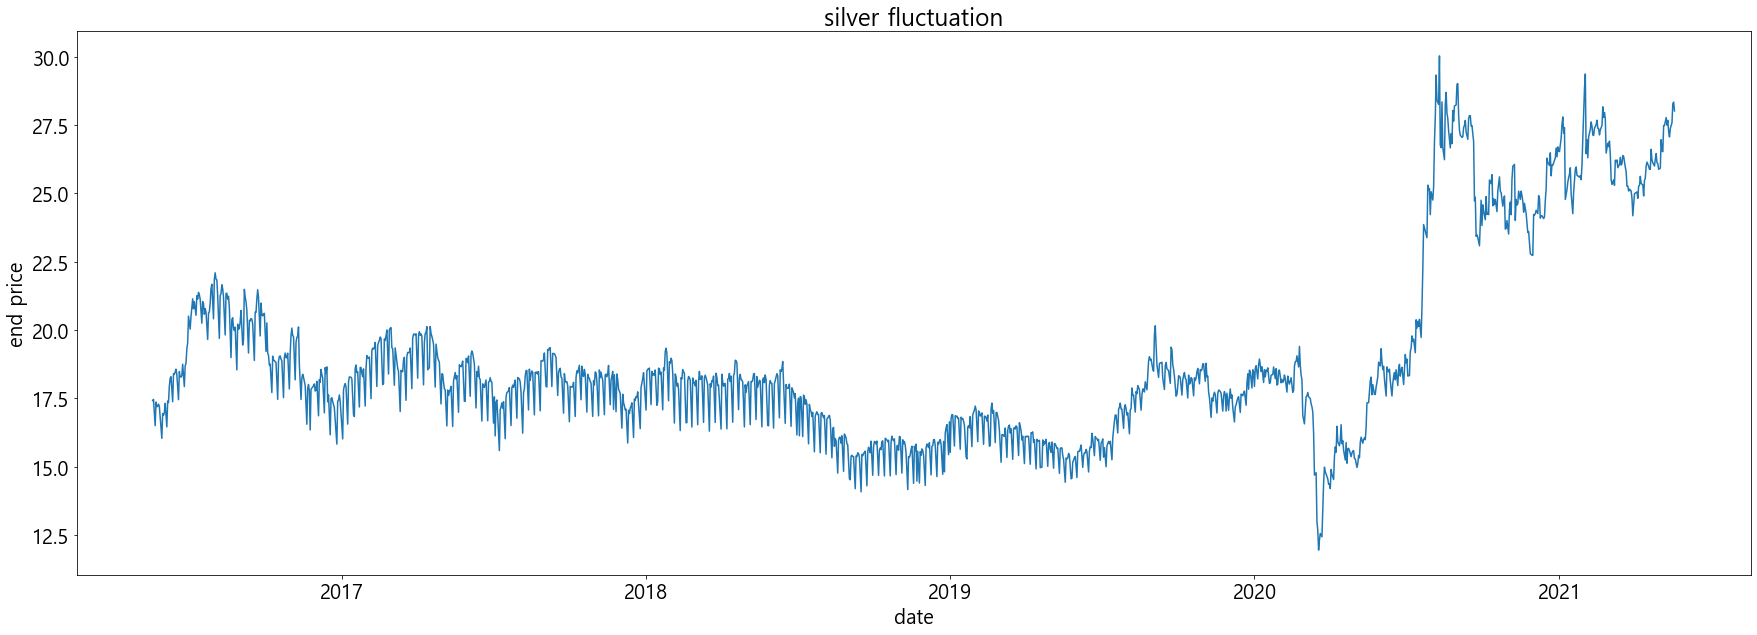

In [38]:
plt.xlabel('date')
plt.ylabel('end price')
plt.title('silver fluctuation')

plt.plot(silver_end['date'], silver_end['end price'])

In [61]:
gold = pd.read_csv('gold_5_year.csv')
gold['날짜'] = pd.to_datetime(gold['날짜'], format ='%Y년 %m월 %d일')
gold = gold.sort_values(by = '날짜').reset_index(drop = True)
for i in comma_list:
    gold[i] = gold[i].apply(remove_comma)
gold_end = gold[['날짜', '종가']]
gold_end.columns = ['date', 'end price']

print(gold_end['end price'].max(), gold_end['end price'].min())
type(gold_end['end price'].max())

2089.40 1134.55


str

TypeError: 'float' object cannot be interpreted as an integer

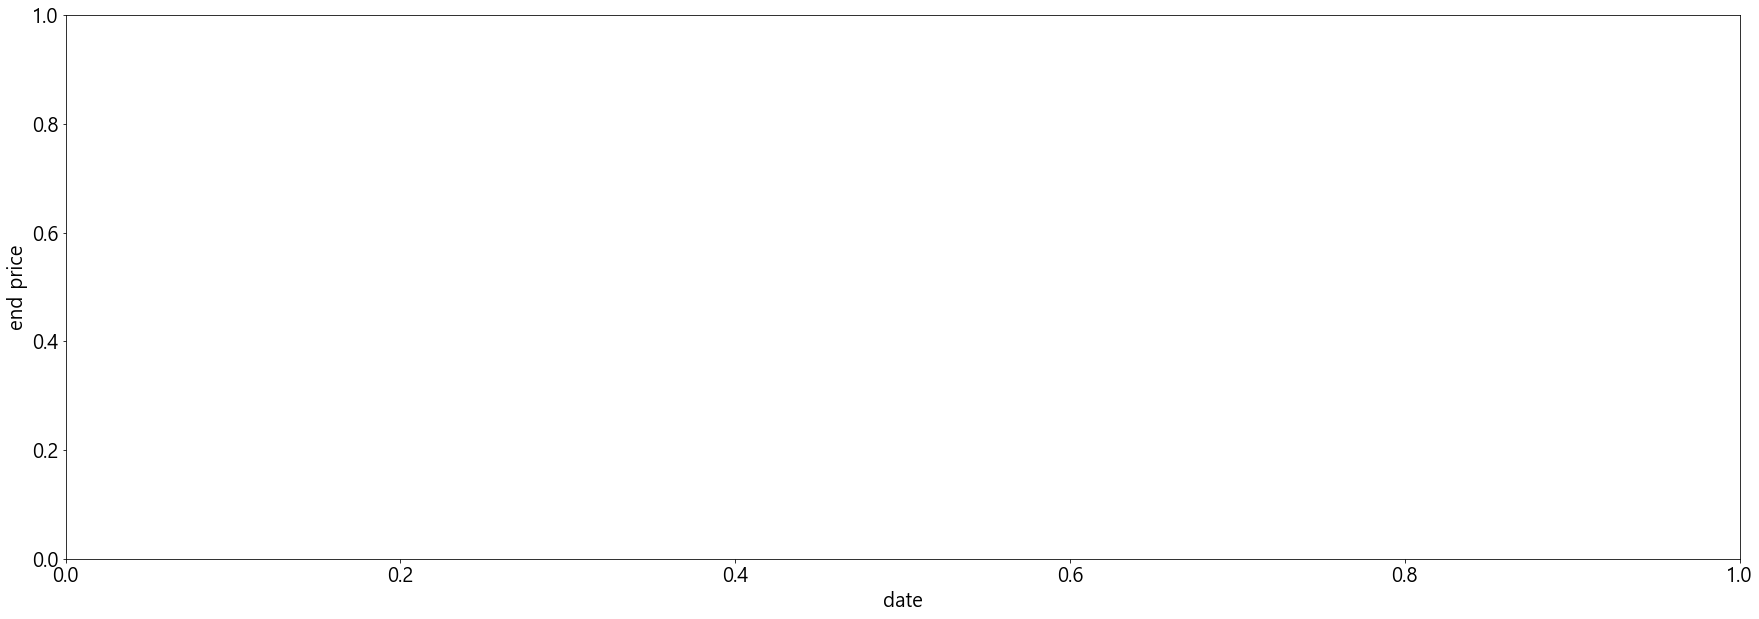

In [62]:
plt.xlabel('date')
plt.ylabel('end price')
plt.yticks([1,2,3,4,5,6,7,8,9,10] , np.linspace(round(float(gold_end['end price'].min()),
                              round(float(gold_end['end price'].max()), 10))))
plt.title('gold fluctuation')
plt.scatter(gold_end['date'], gold_end['end price'])